In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import random
import os
os.environ['R_HOME'] = 'C:\Programming\R\R-4.4.2'

In [2]:
# 재현성 난수 고정
SEED = 100

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(SEED)
np.random.seed(SEED)

In [3]:
# data load
df_name = 'scgas'
df = pd.read_csv(rf'..\datasets\{df_name}.csv')

smiles_list = df['smiles'].tolist()

# target 정의
target = df.iloc[:,-1]

print(smiles_list[:5])
print(target[:5])

['COC(F)(F)C(F)(F)C(F)(F)F', 'COC(F)(F)C(F)(F)F', 'Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br', 'Clc1c(Oc2ccccc2)c(Cl)ccc1Cl', 'Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1']
0    2.75
1    3.21
2   -8.14
3   -3.55
4   -3.66
Name: logvp, dtype: float64


In [20]:
# 3d descriptors
df_all_features = pd.read_csv(r'..\datasets\features_all1_drop_zeros.csv')
df_all_features

,row_index,smiles,logvp,status,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,...,use_USR_002,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011
0,0,COC(F)(F)C(F)(F)C(F)(F)F,2.750000,OK,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,...,-0.815118,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596
1,1,COC(F)(F)C(F)(F)F,3.210000,OK,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,...,-0.795611,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,-8.140000,OK,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,...,0.855538,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,-3.550000,OK,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,...,-0.536865,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,-3.660000,OK,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,...,0.445334,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3127,CC(C)CCCC(C)CCCC(C)CCCC(C)C,-2.356547,OK,C:\temp_xtb_jobs1\003127_13c80d1592,C:\temp_xtb_jobs1\003127_13c80d1592\etkdg.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtbopt.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_opt.log,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_sp.log,C:\temp_xtb_jobs1\003127_13c80d1592\charges,...,0.445395,4.525558,2.415400,0.474375,8.151722,4.543549,-0.596432,7.694189,4.236461,-0.516967
3126,3128,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,-6.657577,OK,C:\temp_xtb_jobs1\003128_41fb29282d,C:\temp_xtb_jobs1\003128_41fb29282d\etkdg.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtbopt.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_opt.log,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_sp.log,C:\temp_xtb_jobs1\003128_41fb29282d\charges,...,-0.663110,2.727574,1.240113,0.388425,4.378730,2.200524,-0.662362,3.959904,2.055257,0.307416
3127,3129,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,-7.522879,OK,C:\temp_xtb_jobs1\003129_7cb25642dc,C:\temp_xtb_jobs1\003129_7cb25642dc\etkdg.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtbopt.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_opt.log,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_sp.log,C:\temp_xtb_jobs1\003129_7cb25642dc\charges,...,-0.647139,2.844752,1.180232,-0.823643,4.716119,2.190938,-0.846721,4.387979,2.021554,-0.792646
3128,3130,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,-7.045757,OK,C:\temp_xtb_jobs1\003130_9f7089451c,C:\temp_xtb_jobs1\003130_9f7089451c\etkdg.xyz,C:\temp_xtb_jobs1\003130_9f7089451c\xtbopt.xyz,C:\temp_xtb_jobs1\003130_9f7089451c\xtb_opt.log,C:\temp_xtb_jobs1\003130_9f7089451c\xtb_sp.log,C:\temp_xtb_jobs1\003130_9f7089451c\charges,...,-0.848593,2.849331,1.128287,-0.887418,4.83

In [ ]:
# # 분자 특성 추출 class
# class MolecularFeatureExtractor:
#     def __init__(self):
#         self.descriptors = [desc[0] for desc in Descriptors._descList]

#     def extract_molecular_features(self, smiles_list):
#         features_dict = {desc: [] for desc in self.descriptors}

#         for smiles in smiles_list:
#             mol = Chem.MolFromSmiles(smiles)
#             if mol:
#                 for descriptor_name in self.descriptors:
#                     descriptor_function = getattr(Descriptors, descriptor_name)
#                     try:
#                         features_dict[descriptor_name].append(descriptor_function(mol))
#                     except:
#                         features_dict[descriptor_name].append(None)
#             else:
#                 for descriptor_name in self.descriptors:
#                     features_dict[descriptor_name].append(None)

#         return pd.DataFrame(features_dict)

In [21]:
target = 'logvp'
target_list = df_all_features[target]
df_all_features['target'] = df_all_features[target]
df_all_features = df_all_features.drop(columns = 'logvp')
df_all_features

,row_index,smiles,status,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,wbo_file,...,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011,target
0,0,COC(F)(F)C(F)(F)C(F)(F)F,OK,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,C:\temp_xtb_jobs1\000000_31f5e4c9db\wbo,...,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596,2.750000
1,1,COC(F)(F)C(F)(F)F,OK,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,C:\temp_xtb_jobs1\000001_38db2c225e\wbo,...,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647,3.210000
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,OK,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,C:\temp_xtb_jobs1\000002_ed1d07e29c\wbo,...,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487,-8.140000
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,OK,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,C:\temp_xtb_jobs1\000003_9766f1ec80\wbo,...,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582,-3.550000
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,OK,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,C:\temp_xtb_jobs1\000004_8bbf82cfd5\wbo,...,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070,-3.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3127,CC(C)CCCC(C)CCCC(C)CCCC(C)C,OK,C:\temp_xtb_jobs1\003127_13c80d1592,C:\temp_xtb_jobs1\003127_13c80d1592\etkdg.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtbopt.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_opt.log,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_sp.log,C:\temp_xtb_jobs1\003127_13c80d1592\charges,C:\temp_xtb_jobs1\003127_13c80d1592\wbo,...,4.525558,2.415400,0.474375,8.151722,4.543549,-0.596432,7.694189,4.236461,-0.516967,-2.356547
3126,3128,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,OK,C:\temp_xtb_jobs1\003128_41fb29282d,C:\temp_xtb_jobs1\003128_41fb29282d\etkdg.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtbopt.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_opt.log,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_sp.log,C:\temp_xtb_jobs1\003128_41fb29282d\charges,C:\temp_xtb_jobs1\003128_41fb29282d\wbo,...,2.727574,1.240113,0.388425,4.378730,2.200524,-0.662362,3.959904,2.055257,0.307416,-6.657577
3127,3129,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,OK,C:\temp_xtb_jobs1\003129_7cb25642dc,C:\temp_xtb_jobs1\003129_7cb25642dc\etkdg.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtbopt.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_opt.log,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_sp.log,C:\temp_xtb_jobs1\003129_7cb25642dc\charges,C:\temp_xtb_jobs1\003129_7cb25642dc\wbo,...,2.844752,1.180232,-0.823643,4.716119,2.190938,-0.846721,4.387979,2.021554,-0.792646,-7.522879
3128,3130,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,OK,C:\temp_xtb_jobs1\003130_9f7089451c,C:\temp_xtb_jobs1\003130_9f7089451c\etkdg.xyz,C

In [26]:
df_all_features.filter(regex = '^(use_|target$)')

,use_AUTOCORR3D_000,use_AUTOCORR3D_001,use_AUTOCORR3D_002,use_AUTOCORR3D_003,use_AUTOCORR3D_004,use_AUTOCORR3D_005,use_AUTOCORR3D_006,use_AUTOCORR3D_007,use_AUTOCORR3D_008,use_AUTOCORR3D_009,...,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011,target
0,0.232,0.666,0.985,0.682,0.186,0.000,0.000,0.000,0.000,0.000,...,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596,2.750000
1,0.307,0.826,1.019,0.321,0.000,0.000,0.000,0.000,0.000,0.000,...,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647,3.210000
2,0.189,0.453,0.646,0.580,0.549,0.627,0.566,0.404,0.179,0.071,...,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487,-8.140000
3,0.205,0.475,0.643,0.610,0.662,0.670,0.434,0.122,0.000,0.000,...,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582,-3.550000
4,0.205,0.475,0.619,0.618,0.634,0.683,0.514,0.194,0.000,0.000,...,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070,-3.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,0.161,0.312,0.372,0.455,0.526,0.681,0.547,0.562,0.563,0.670,...,4.525558,2.415400,0.474375,8.151722,4.543549,-0.596432,7.694189,4.236461,-0.516967,-2.356547
3126,0.192,0.494,0.765,0.915,0.788,0.434,0.144,0.000,0.000,0.000,...,2.727574,1.240113,0.388425,4.378730,2.200524,-0.662362,3.959904,2.055257,0.307416,-6.657577
3127,0.163,0.384,0.562,0.746,0.883,0.742,0.418,0.112,0.000,0.000,...,2.844752,1.180232,-0.823643,4.716119,2.190938,-0.846721,4.387979,2.021554,-0.792646,-7.522879
3128,0.169,0.410,0.592,0.742,0.898,0.789,0.403,0.077,0.000,0.000,...,2.849331,1.128287,-0.887418,4.838988,2.286404,-0.836556,4.270345,2.088937,-0.653688,-7.045757


In [27]:
num_all_features = df_all_features.shape[1] - 1  # logvp 열 제외
print("초기 변수 개수:", num_all_features)

초기 변수 개수: 2647


# 1. NA Handling

In [28]:
# NA 확인
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
df_all_features[df_all_features.isna().any(axis = 1)]

,row_index,smiles,status,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,wbo_file,...,use_USR_003,use_USR_004,use_USR_005,use_USR_006,use_USR_007,use_USR_008,use_USR_009,use_USR_010,use_USR_011,target
0,0,COC(F)(F)C(F)(F)C(F)(F)F,OK,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,C:\temp_xtb_jobs1\000000_31f5e4c9db\wbo,...,1.941462,0.789485,-0.971546,3.058001,1.281747,-0.966900,2.934125,1.400109,-0.736596,2.750000
1,1,COC(F)(F)C(F)(F)F,OK,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,C:\temp_xtb_jobs1\000001_38db2c225e\wbo,...,1.683508,0.757105,-0.964049,2.749764,1.278988,-0.947010,2.395266,1.195080,-0.667647,3.210000
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,OK,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,C:\temp_xtb_jobs1\000002_ed1d07e29c\wbo,...,3.145529,1.610383,0.677395,5.941929,2.854607,-0.625985,5.621790,2.816988,-0.297487,-8.140000
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,OK,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,C:\temp_xtb_jobs1\000003_9766f1ec80\wbo,...,2.749160,1.299702,-0.456483,4.390729,2.319013,-0.676213,3.914268,2.140146,0.397582,-3.550000
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,OK,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,C:\temp_xtb_jobs1\000004_8bbf82cfd5\wbo,...,2.829709,1.334348,-0.603111,5.051878,2.397603,-0.685220,4.520729,2.492009,-0.509070,-3.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3127,CC(C)CCCC(C)CCCC(C)CCCC(C)C,OK,C:\temp_xtb_jobs1\003127_13c80d1592,C:\temp_xtb_jobs1\003127_13c80d1592\etkdg.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtbopt.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_opt.log,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_sp.log,C:\temp_xtb_jobs1\003127_13c80d1592\charges,C:\temp_xtb_jobs1\003127_13c80d1592\wbo,...,4.525558,2.415400,0.474375,8.151722,4.543549,-0.596432,7.694189,4.236461,-0.516967,-2.356547
3126,3128,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,OK,C:\temp_xtb_jobs1\003128_41fb29282d,C:\temp_xtb_jobs1\003128_41fb29282d\etkdg.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtbopt.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_opt.log,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_sp.log,C:\temp_xtb_jobs1\003128_41fb29282d\charges,C:\temp_xtb_jobs1\003128_41fb29282d\wbo,...,2.727574,1.240113,0.388425,4.378730,2.200524,-0.662362,3.959904,2.055257,0.307416,-6.657577
3127,3129,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,OK,C:\temp_xtb_jobs1\003129_7cb25642dc,C:\temp_xtb_jobs1\003129_7cb25642dc\etkdg.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtbopt.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_opt.log,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_sp.log,C:\temp_xtb_jobs1\003129_7cb25642dc\charges,C:\temp_xtb_jobs1\003129_7cb25642dc\wbo,...,2.844752,1.180232,-0.823643,4.716119,2.190938,-0.846721,4.387979,2.021554,-0.792646,-7.522879
3128,3130,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,OK,C:\temp_xtb_jobs1\003130_9f7089451c,C:\temp_xtb_jobs1\003130_9f7089451c\etkdg.xyz,C

In [29]:
# 결측치가 포함된 feature 개수
print('결측치가 포함된 열 개수:', df_all_features.isna().any(axis = 0).sum(), '\n')
print(df_all_features.isna().any(axis = 0))

결측치가 포함된 열 개수: 649 

row_index      False
smiles         False
status         False
jobdir         False
etkdg_xyz      False
               ...  
use_USR_008     True
use_USR_009     True
use_USR_010     True
use_USR_011     True
target         False
Length: 2648, dtype: bool


In [ ]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [9]:
# 결측치가 포함된 feature 제거
df_removed_features = df_all_features.dropna(axis = 1)
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features)

제거 후 남은 feature 개수: 1998


In [10]:
# 결측치가 제거된 data frame
df_removed_features

,row_index,smiles,status,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,wbo_file,...,use_MORSE_222,use_MORSE_223,use_NPR1,use_NPR2,use_PMI1,use_PMI2,use_PMI3,use_RadiusOfGyration,use_SpherocityIndex,target
0,0,COC(F)(F)C(F)(F)C(F)(F)F,OK,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,C:\temp_xtb_jobs1\000000_31f5e4c9db\wbo,...,0.975,-2.932,0.586127,0.930730,366.125821,581.383301,624.653008,1.997416,5.713252e-01,2.750000
1,1,COC(F)(F)C(F)(F)F,OK,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,C:\temp_xtb_jobs1\000001_38db2c225e\wbo,...,6.160,-5.505,0.596788,0.898079,215.168925,323.797924,360.544920,1.749030,5.316845e-01,3.210000
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,OK,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,C:\temp_xtb_jobs1\000002_ed1d07e29c\wbo,...,-0.738,-2.670,0.191351,0.925150,1444.983859,6986.255074,7551.482733,3.778781,2.217604e-01,-8.140000
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,OK,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,C:\temp_xtb_jobs1\000003_9766f1ec80\wbo,...,-0.992,-3.303,0.437027,0.656371,962.785321,1446.005380,2203.031933,2.941581,1.624028e-01,-3.550000
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,OK,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,C:\temp_xtb_jobs1\000004_8bbf82cfd5\wbo,...,-0.642,-2.782,0.320163,0.765978,798.083140,1909.383290,2492.737619,3.123595,1.586489e-01,-3.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3127,CC(C)CCCC(C)CCCC(C)CCCC(C)C,OK,C:\temp_xtb_jobs1\003127_13c80d1592,C:\temp_xtb_jobs1\003127_13c80d1592\etkdg.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtbopt.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_opt.log,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_sp.log,C:\temp_xtb_jobs1\003127_13c80d1592\charges,C:\temp_xtb_jobs1\003127_13c80d1592\wbo,...,0.650,-0.187,0.109157,0.925900,593.979529,5038.309320,5441.527040,4.925692,5.167915e-02,-2.356547
3126,3128,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,OK,C:\temp_xtb_jobs1\003128_41fb29282d,C:\temp_xtb_jobs1\003128_41fb29282d\etkdg.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtbopt.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_opt.log,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_sp.log,C:\temp_xtb_jobs1\003128_41fb29282d\charges,C:\temp_xtb_jobs1\003128_41fb29282d\wbo,...,-2.767,-4.384,0.343189,0.656811,591.944412,1132.891470,1724.835882,2.798846,2.390000e-14,-6.657577
3127,3129,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,OK,C:\temp_xtb_jobs1\003129_7cb25642dc,C:\temp_xtb_jobs1\003129_7cb25642dc\etkdg.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtbopt.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_opt.log,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_sp.log,C:\temp_xtb_jobs1\003129_7cb25642dc\charges,C:\temp_xtb_jobs1\003129_7cb25642dc\wbo,...,-0.721,-8.094,0.576235,0.649170,1120.123074,1261.899701,1943.866303,2.976067,2.807047e-01,-7.522879
3128,3130,C1=CC=C(C=C1)C1=C2C=CC=CC2=CC2=C1C=CC=C2,OK,C:\temp_xtb_jobs1\003130_9f7089451c,C

# 2. nunique == 1 인 경우

In [11]:
unique_columns = list(df_removed_features.loc[:, df_removed_features.nunique() == 1].columns)
print('nunique == 1인 feature : \n', unique_columns, '\n')

# nunique == 1인 feature 제거
#df_removed_features.drop(columns = unique_columns, inplace = True)
df_removed_features = df_removed_features.drop(columns = unique_columns).copy()

num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)


nunique == 1인 feature : 
 ['status', 'xtb_available'] 

제거 후 남은 feature 개수: 1996 

(3130, 1997)


In [12]:
df_removed_features

,row_index,smiles,jobdir,etkdg_xyz,xtbopt_xyz,xtb_opt_log,xtb_sp_log,charges_file,wbo_file,molden_file,...,use_MORSE_222,use_MORSE_223,use_NPR1,use_NPR2,use_PMI1,use_PMI2,use_PMI3,use_RadiusOfGyration,use_SpherocityIndex,target
0,0,COC(F)(F)C(F)(F)C(F)(F)F,C:\temp_xtb_jobs1\000000_31f5e4c9db,C:\temp_xtb_jobs1\000000_31f5e4c9db\etkdg.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtbopt.xyz,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_opt.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\xtb_sp.log,C:\temp_xtb_jobs1\000000_31f5e4c9db\charges,C:\temp_xtb_jobs1\000000_31f5e4c9db\wbo,C:\temp_xtb_jobs1\000000_31f5e4c9db\molden.input,...,0.975,-2.932,0.586127,0.930730,366.125821,581.383301,624.653008,1.997416,5.713252e-01,2.750000
1,1,COC(F)(F)C(F)(F)F,C:\temp_xtb_jobs1\000001_38db2c225e,C:\temp_xtb_jobs1\000001_38db2c225e\etkdg.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtbopt.xyz,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_opt.log,C:\temp_xtb_jobs1\000001_38db2c225e\xtb_sp.log,C:\temp_xtb_jobs1\000001_38db2c225e\charges,C:\temp_xtb_jobs1\000001_38db2c225e\wbo,C:\temp_xtb_jobs1\000001_38db2c225e\molden.input,...,6.160,-5.505,0.596788,0.898079,215.168925,323.797924,360.544920,1.749030,5.316845e-01,3.210000
2,2,Brc1cc(Br)c(cc1)Oc1ccc(Br)c(Br)c1Br,C:\temp_xtb_jobs1\000002_ed1d07e29c,C:\temp_xtb_jobs1\000002_ed1d07e29c\etkdg.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtbopt.xyz,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_opt.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\xtb_sp.log,C:\temp_xtb_jobs1\000002_ed1d07e29c\charges,C:\temp_xtb_jobs1\000002_ed1d07e29c\wbo,C:\temp_xtb_jobs1\000002_ed1d07e29c\molden.input,...,-0.738,-2.670,0.191351,0.925150,1444.983859,6986.255074,7551.482733,3.778781,2.217604e-01,-8.140000
3,3,Clc1c(Oc2ccccc2)c(Cl)ccc1Cl,C:\temp_xtb_jobs1\000003_9766f1ec80,C:\temp_xtb_jobs1\000003_9766f1ec80\etkdg.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtbopt.xyz,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_opt.log,C:\temp_xtb_jobs1\000003_9766f1ec80\xtb_sp.log,C:\temp_xtb_jobs1\000003_9766f1ec80\charges,C:\temp_xtb_jobs1\000003_9766f1ec80\wbo,C:\temp_xtb_jobs1\000003_9766f1ec80\molden.input,...,-0.992,-3.303,0.437027,0.656371,962.785321,1446.005380,2203.031933,2.941581,1.624028e-01,-3.550000
4,4,Clc1cc(Oc2ccccc2)c(Cl)c(Cl)c1,C:\temp_xtb_jobs1\000004_8bbf82cfd5,C:\temp_xtb_jobs1\000004_8bbf82cfd5\etkdg.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtbopt.xyz,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_opt.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\xtb_sp.log,C:\temp_xtb_jobs1\000004_8bbf82cfd5\charges,C:\temp_xtb_jobs1\000004_8bbf82cfd5\wbo,C:\temp_xtb_jobs1\000004_8bbf82cfd5\molden.input,...,-0.642,-2.782,0.320163,0.765978,798.083140,1909.383290,2492.737619,3.123595,1.586489e-01,-3.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3127,CC(C)CCCC(C)CCCC(C)CCCC(C)C,C:\temp_xtb_jobs1\003127_13c80d1592,C:\temp_xtb_jobs1\003127_13c80d1592\etkdg.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtbopt.xyz,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_opt.log,C:\temp_xtb_jobs1\003127_13c80d1592\xtb_sp.log,C:\temp_xtb_jobs1\003127_13c80d1592\charges,C:\temp_xtb_jobs1\003127_13c80d1592\wbo,C:\temp_xtb_jobs1\003127_13c80d1592\molden.input,...,0.650,-0.187,0.109157,0.925900,593.979529,5038.309320,5441.527040,4.925692,5.167915e-02,-2.356547
3126,3128,O=C1C2=CC=CC3=C2C(=CC=C3)C2=C1C=CC=C2,C:\temp_xtb_jobs1\003128_41fb29282d,C:\temp_xtb_jobs1\003128_41fb29282d\etkdg.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtbopt.xyz,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_opt.log,C:\temp_xtb_jobs1\003128_41fb29282d\xtb_sp.log,C:\temp_xtb_jobs1\003128_41fb29282d\charges,C:\temp_xtb_jobs1\003128_41fb29282d\wbo,C:\temp_xtb_jobs1\003128_41fb29282d\molden.input,...,-2.767,-4.384,0.343189,0.656811,591.944412,1132.891470,1724.835882,2.798846,2.390000e-14,-6.657577
3127,3129,OC(C1=CC=CC=C1)(C1=CC=CC=C1)C1=CC=CC=C1,C:\temp_xtb_jobs1\003129_7cb25642dc,C:\temp_xtb_jobs1\003129_7cb25642dc\etkdg.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtbopt.xyz,C:\temp_xtb_jobs1\003129_7cb25642dc\xtb_opt.log,C:

# 3. 너무 낮은 variance를 가지는 경우

In [13]:
low_variances = sorted(df_removed_features.var())
low_variances[:10]

TypeError: could not convert string to float: 'COC(F)(F)C(F)(F)C(F)(F)F'

In [47]:
columns_low_variances = []

for i in low_variances:
    if i < 0.001:
        column = df_removed_features.loc[:, df_removed_features.var() == i].columns
        columns_low_variances.append(column)
columns_low_variances = [item for index in columns_low_variances for item in index]

# 2. 중복 제거 및 유니크 값 추출
columns_low_variances = list(set(columns_low_variances))
print(columns_low_variances)

[]


In [48]:
# 낮은 분산의 변수 제거
df_removed_features = df_removed_features.drop(columns = columns_low_variances).copy()
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)

제거 후 남은 feature 개수: 177 

(642, 178)


In [49]:
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_piperzine,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfone,fr_term_acetylene,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,11.429183,0.002457,11.429183,0.002457,0.686360,179.219,166.115,179.094629,70,0.252836,...,0,0,0,0,0,0,0,0,0,-11.01
1,9.397377,-3.194444,9.397377,0.925154,0.421427,114.553,111.529,113.954228,32,0.229212,...,0,0,0,0,0,0,0,0,0,-4.87
2,3.560185,0.648148,3.560185,0.648148,0.412737,70.135,60.055,70.078250,30,-0.029310,...,0,0,0,0,0,0,0,0,0,1.83
3,4.034722,0.966111,4.034722,0.966111,0.536795,108.144,100.080,108.068748,42,0.058343,...,0,0,0,0,0,0,0,0,0,-5.45
4,8.365587,0.364796,8.365587,0.364796,0.544191,116.204,100.076,116.120115,50,0.043052,...,0,0,0,0,0,0,0,3,0,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,10.622272,-0.081946,10.622272,0.081946,0.438315,158.241,140.097,158.130680,66,0.305002,...,0,0,0,0,0,0,0,3,0,-2.04
638,3.222222,1.250000,3.222222,1.250000,0.434794,71.123,62.051,71.073499,30,-0.004845,...,0,0,0,0,0,0,0,0,0,-5.48
639,10.036149,0.181111,10.036149,0.181111,0.568137,122.123,116.075,122.036779,46,0.149553,...,0,0,0,0,0,0,0,0,0,-8.83
640,5.480456,0.837018,5.480456,0.837018,0.400312,134.650,119.530,134.086228,50,0.022296,...,0,0,0,0,0,0,0,3,0,0.29


# 4. 데이터 스크리닝 (ISIS)

In [50]:
X_train = df_removed_features.drop(columns = 'target')
y_train = df_removed_features['target']

print(X_train.shape)
print(y_train.shape)

(642, 177)
(642,)


In [51]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
print(X_train_scaling.shape)

(642, 177)


In [52]:
# Python to R type
from rpy2.robjects import r
from rpy2.robjects import pandas2ri
from rpy2.robjects import FloatVector

pandas2ri.activate()

X_train_scaling = r['as.matrix'](X_train_scaling)

y_train = FloatVector(y_train)

nfolds = 10
nfolds = FloatVector([nfolds])[0]

nsis = 100
nsis = FloatVector([nsis])[0]

seed = 9
seed = FloatVector([seed])[0]

In [80]:
from rpy2.robjects.packages import importr
import sys
import io

SIS = importr('SIS')

# R 출력이 발생할 때 UTF-8 오류를 방지하기 위해, 표준 출력을 임시로 바꿔서 처리할 수 있습니다.
#r('Sys.setlocale("LC_ALL", "C.UTF-8")')

# model1 = SIS(...)
model1 = SIS.SIS(X_train_scaling,y_train,
    family="gaussian",
#    penalty="MCP",
    tune="cv",
    nfolds=nfolds,
    nsis=nsis,
    varISIS="vanilla",
    seed=seed,
    q = 0.95,
    standardize=False)


Iter 1 , screening:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
Iter 1 , selection:  1 8 9 12 14 15 17 19 20 21 22 23 30 31 
Iter 1 , conditional-screening:  2 3 4 5 6 7 10 11 13 16 18 24 25 26 27 28 29 32 
Iter 2 , screening:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
Iter 2 , selection:  1 2 4 8 9 12 14 15 17 19 20 21 22 23 30 31 
Iter 2 , conditional-screening:  3 5 6 7 10 11 13 16 18 24 25 26 27 28 29 32 
Iter 3 , screening:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
Iter 3 , selection:  1 2 4 9 10 11 12 14 15 16 17 18 19 20 21 22 26 27 28 29 30 31 32 
Iter 3 , conditional-screening:  3 5 6 7 8 13 23 24 25 
Iter 4 , screening:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 
Iter 4 , selection:  1 2 9 14 18 19 20 21 23 30 
Iter 4 , conditional-screening:  3 4 5 6 7 8 10 11 12 13 15 16 17 22 24 25 26 27 28 29

In [81]:
print(str(model1))

$sis.ix0
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32

$ix
 [1]  1  2  4  9 10 11 12 14 15 16 17 18 19 20 21 22 26 27 28 29 30 31 32

$coef.est
(Intercept)          X1          X2          X4          X9         X10 
 -3.7862768  -1.0341761  -0.3440233   0.6799889   3.7543747   2.5806410 
        X11         X12         X14         X15         X16         X17 
  0.8690236   0.7195876  -0.7605687  -0.4637248   2.8155390  -3.3819405 
        X18         X19         X20         X21         X22         X26 
 -1.5874014   5.6533374  -0.4848337  -0.7345867  -0.5563800   3.5885377 
        X27         X28         X29         X30         X31         X32 
 -5.9769588   4.4412977  -1.7753666  -0.5608499  -0.7746371  -0.4994871 

$fit
$beta
               2.2806     2.1269     1.9836     1.8499     1.7252     1.6089
(Intercept) -3.786277 -3.7862768 -3.7862768 -3.7862768 -3.7862768 -3.7862768
V1           0.000000  0.0000000  0.0000000  

In [82]:
print(df_removed_features.shape)
print('\n')
print(df_removed_features.columns)

(642, 178)


Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_piperzine', 'fr_priamide', 'fr_pyridine', 'fr_sulfide',
       'fr_sulfone', 'fr_term_acetylene', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'target'],
      dtype='object', length=178)


In [83]:
# 선택된 feature들의 index
selected_features_ISIS = np.array(model1.rx2('ix'))

# R은 index가 1부터 시작하므로 python에 맞게 보정
selected_features_ISIS = selected_features_ISIS - 1
selected_features_ISIS

array([ 0,  1,  3,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25,
       26, 27, 28, 29, 30, 31])

In [84]:
df_removed_features_columns = df_removed_features.columns
print(f'ISIS 적용 전 features: {df_removed_features_columns.size}개')
print(df_removed_features_columns, '\n')

selected_features = df_removed_features_columns[selected_features_ISIS]
print(f'ISIS 적용 후 features: {selected_features.size}개')
print(selected_features)

ISIS 적용 전 features: 178개
Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_piperzine', 'fr_priamide', 'fr_pyridine', 'fr_sulfide',
       'fr_sulfone', 'fr_term_acetylene', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'target'],
      dtype='object', length=178) 

ISIS 적용 후 features: 23개
Index(['MaxEStateIndex', 'MinEStateIndex', 'MinAbsEStateIndex',
       'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BertzCT', 'Chi0',
       'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v'],
      dtype='object')


In [85]:
df_ISIS = df_removed_features[list(selected_features) + ['target']]
df_ISIS

,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,target
0,11.429183,0.002457,0.002457,70,0.252836,-0.496768,0.496768,1.230769,1.769231,2.153846,...,2.113956,-2.208845,290.297985,9.844935,8.073111,8.073111,6.147066,4.005898,4.005898,-11.01
1,9.397377,-3.194444,0.925154,32,0.229212,-0.212518,0.229212,1.600000,1.600000,1.600000,...,1.830525,-1.755765,92.816358,4.500000,2.602709,4.175135,2.000000,0.895885,3.613475,-4.87
2,3.560185,0.648148,0.648148,30,-0.029310,-0.102824,0.102824,1.600000,1.800000,1.800000,...,1.867761,-1.706535,27.019550,4.284457,3.861807,3.861807,2.270056,1.896282,1.896282,1.83
3,4.034722,0.966111,0.966111,42,0.058343,-0.261224,0.261224,1.500000,2.375000,2.750000,...,1.873064,-1.840274,147.874524,5.819991,4.833585,4.833585,3.931852,2.680872,2.680872,-5.45
4,8.365587,0.364796,0.364796,50,0.043052,-0.396377,0.396377,1.000000,1.625000,2.125000,...,1.999292,-1.812372,29.368066,6.242641,5.689854,5.689854,3.914214,3.523335,3.523335,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,10.622272,-0.081946,0.081946,66,0.305002,-0.468995,0.468995,1.181818,1.818182,2.363636,...,2.044634,-1.984414,99.735855,8.527098,7.559137,7.559137,5.308060,4.377157,4.377157,-2.04
638,3.222222,1.250000,1.250000,30,-0.004845,-0.316731,0.316731,1.000000,1.600000,1.800000,...,1.897222,-2.030855,15.219281,3.535534,3.328427,3.328427,2.500000,2.207107,2.207107,-5.48
639,10.036149,0.181111,0.181111,46,0.149553,-0.507966,0.507966,1.222222,1.777778,2.222222,...,2.065018,-1.742530,200.661065,6.690234,4.742213,4.742213,4.325699,2.569351,2.569351,-8.83
640,5.480456,0.837018,0.837018,50,0.022296,-0.126717,0.126717,1.000000,1.625000,2.125000,...,2.017510,-1.761432,29.368066,6.242641,5.620605,6.376534,3.914214,3.474368,4.008891,0.29


# 5. 엘라스틱 넷

In [86]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [87]:
X_ISIS = df_ISIS.drop(columns = ['target'])
y_ISIS = df_ISIS['target']

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X_ISIS, y_ISIS, test_size = 0.2, random_state = SEED)

# scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
X_test_scaling = scaler.transform(X_test)

print(X_train_scaling.shape)
print(X_test_scaling.shape)

(513, 23)
(129, 23)


In [88]:
# ElasticNet 모델과 하이퍼파라미터 범위 설정
elastic_net = ElasticNet(max_iter = 5000)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # 정규화 강도
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # L1과 L2 비율
}

kfold = KFold(n_splits = 5, shuffle = True, random_state = SEED)

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(
    estimator = elastic_net,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error', # 그리드서치에서는 score가 최대가 되도록 하는 것이 목표라서 그냥 mse로 하면 값이 작을수록 좋아져버리니까 negative
    cv = kfold,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_scaling, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=ElasticNet(max_iter=5000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
best_params = grid_search.best_params_
print(best_params)

{'alpha': 0.01, 'l1_ratio': 1.0}


In [90]:
# 최적 하이퍼파라미터로 ElasticNet 모델 생성
best_params = grid_search.best_params_

best_elastic_net = ElasticNet(
    alpha = best_params['alpha'],
    l1_ratio = best_params['l1_ratio'],
    max_iter = 5000,
    fit_intercept=True
)

In [91]:
# 적합
best_elastic_net.fit(X_train_scaling, y_train)

coefficients = best_elastic_net.coef_
coefficients.size

23

In [92]:
# 엘라스틱넷 적합이후 모든 변수
selected_features_elastic = list(X_train.loc[:, best_elastic_net.coef_ != 0].columns)

print(f'# {len(X_train.loc[:, best_elastic_net.coef_ != 0].columns)}개')
print(f'{df_name}_all =', selected_features_elastic, '\n')

# 20개
freesolv_all = ['MaxEStateIndex', 'MinEStateIndex', 'MinAbsEStateIndex', 'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BertzCT', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v'] 



In [79]:
# 계수 0인 변수
print(f'회귀계수가 0 인 변수: {len(X_train.loc[:, best_elastic_net.coef_ == 0].columns)}개')
print(f'{df_name}_all =', X_train.columns[best_elastic_net.coef_ == 0], '\n')

회귀계수가 0 인 변수: 0개
freesolv_all = Index([], dtype='object') 



## default 3개 이용 (나머지 변수는 랜덤이라 성능 X)

In [73]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))


# def mol_conv_upper(elastic_list):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{i} = dsc.{i}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list):
#     print('\n')
#     print('mol_conv.py under')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{i}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list):
#     print('\n')
#     print('exec_reg.py')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{i}")
#         idx += 1
#         n += 1


# mol_conv_upper(selected_features_elastic)
# mol_conv_under(selected_features_elastic)
# exec_reg(selected_features_elastic)


# abs(coef)

In [74]:
# 계수가 0인 변수는 제거
X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
coefficients_None0 = coefficients[coefficients!=0]

# 특성과 회귀계수 매핑
df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
                                       'Coefficient' : coefficients_None0})

# 계수 큰 값 기준으로
final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
final_selected_features_index = final_selected_features.index

X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]

def mol_conv_upper(elastic_list, df):
    print('mol_conv.py upper')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
        idx += 1
        n += 1

def mol_conv_under(elastic_list, df):
    print('\n')
    print('mol_conv.py under')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
        idx += 1
        n += 1

def exec_reg(elastic_list, df):
    print('\n')
    print('exec_reg.py')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
        idx += 1
        n += 1

# 출력
mol_conv_upper(selected_features_elastic, X_train_None0)
mol_conv_under(selected_features_elastic, X_train_None0)
exec_reg(selected_features_elastic, X_train_None0)

mol_conv.py upper
# 1
mol_graph.MolLogP = dsc.MolLogP(mol)
mol_graph.SMR_VSA10 = dsc.SMR_VSA10(mol)
mol_graph.MaxEStateIndex = dsc.MaxEStateIndex(mol)
mol_graph.MaxAbsPartialCharge = dsc.MaxAbsPartialCharge(mol)
mol_graph.BCUT2D_CHGHI = dsc.BCUT2D_CHGHI(mol)
# 6
mol_graph.BCUT2D_MWLOW = dsc.BCUT2D_MWLOW(mol)
mol_graph.fr_imide = dsc.fr_imide(mol)
mol_graph.Kappa2 = dsc.Kappa2(mol)
mol_graph.MinAbsPartialCharge = dsc.MinAbsPartialCharge(mol)
mol_graph.NumAromaticHeterocycles = dsc.NumAromaticHeterocycles(mol)
# 11
mol_graph.SlogP_VSA1 = dsc.SlogP_VSA1(mol)
mol_graph.fr_amide = dsc.fr_amide(mol)
mol_graph.BalabanJ = dsc.BalabanJ(mol)
mol_graph.fr_Ar_NH = dsc.fr_Ar_NH(mol)
mol_graph.PEOE_VSA8 = dsc.PEOE_VSA8(mol)
# 16
mol_graph.NumSaturatedRings = dsc.NumSaturatedRings(mol)
mol_graph.fr_NH0 = dsc.fr_NH0(mol)
mol_graph.PEOE_VSA13 = dsc.PEOE_VSA13(mol)
mol_graph.fr_barbitur = dsc.fr_barbitur(mol)
mol_graph.fr_alkyl_halide = dsc.fr_alkyl_halide(mol)
# 21
mol_graph.fr_C_O = dsc.fr_C_O(mol)
mo

In [75]:
# 계수가 0인 변수는 제거
X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
coefficients_None0 = coefficients[coefficients!=0]

# 특성과 회귀계수 매핑
df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
                                       'Coefficient' : coefficients_None0})

# 계수 큰 값 기준으로
final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
final_selected_features_index = final_selected_features.index

X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]

def mol_conv_upper(elastic_list, df):
    print('mol_conv.py upper')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(X_train_None0_copy.columns[i])
        idx += 1
        n += 1

mol_conv_upper(selected_features_elastic, X_train_None0)

mol_conv.py upper
# 1
MolLogP
SMR_VSA10
MaxEStateIndex
MaxAbsPartialCharge
BCUT2D_CHGHI
# 6
BCUT2D_MWLOW
fr_imide
Kappa2
MinAbsPartialCharge
NumAromaticHeterocycles
# 11
SlogP_VSA1
fr_amide
BalabanJ
fr_Ar_NH
PEOE_VSA8
# 16
NumSaturatedRings
fr_NH0
PEOE_VSA13
fr_barbitur
fr_alkyl_halide
# 21
fr_C_O
fr_bicyclic
fr_ester
PEOE_VSA9
fr_Al_OH_noTert
# 26
SlogP_VSA10
EState_VSA11
fr_imidazole
EState_VSA10
EState_VSA5
# 31
SMR_VSA9
FractionCSP3
FpDensityMorgan2
fr_furan
fr_hdrzine
# 36
fr_aryl_methyl
EState_VSA8
fr_phos_acid
SlogP_VSA7
SlogP_VSA4
# 41
EState_VSA2
fr_nitro_arom_nonortho
fr_para_hydroxylation


In [302]:
# 통계량
re1 = pd.DataFrame(df_ISIS.iloc[:, -1].describe()).T
re2 = df_ISIS.iloc[:, final_selected_features_index].describe().T

re3 = pd.concat([re1, re2], axis = 0)
print(re3)

                          count       mean        std           min  \
target                   9880.0   6.243831   1.721764  4.000000e-01   
VSA_EState6              9880.0   6.687242   8.858869 -2.728175e+01   
Chi4n                    9880.0   3.720386   2.653301  0.000000e+00   
MolLogP                  9880.0   0.007070   4.642694 -2.501300e+01   
NumAromaticHeterocycles  9880.0   0.787045   0.922217  0.000000e+00   
fr_halogen               9880.0   0.450810   0.988039  0.000000e+00   
FractionCSP3             9880.0   0.403873   0.267516  0.000000e+00   
SlogP_VSA6               9880.0  36.200433  26.552008  0.000000e+00   
PEOE_VSA3                9880.0   5.330659   6.737108  0.000000e+00   
SlogP_VSA3               9880.0  17.818424  21.055484  0.000000e+00   
fr_Ndealkylation2        9880.0   0.158907   0.556233  0.000000e+00   
fr_Al_COO                9880.0   0.410830   0.843417  0.000000e+00   
fr_NH2                   9880.0   0.639271   1.157868  0.000000e+00   
MinAbs

In [303]:
# overleaf 양식에 맞게 통계량 출력
for i in range(len(re3)):
    print(f'{re3.iloc[i].name.replace("_", "")} & {re3.iloc[i]["mean"]:.2f} & {re3.iloc[i]["std"]:.2f} & {re3.iloc[i]["min"]:.2f} & {re3.iloc[i]["25%"]:.2f} & {re3.iloc[i]["50%"]:.2f} & {re3.iloc[i]["75%"]:.2f} & {re3.iloc[i]["max"]:.2f} \\\\')

target & 6.24 & 1.72 & 0.40 & 5.02 & 6.40 & 7.62 & 9.30 \\
VSAEState6 & 6.69 & 8.86 & -27.28 & 0.00 & 6.70 & 12.54 & 46.62 \\
Chi4n & 3.72 & 2.65 & 0.00 & 2.02 & 3.10 & 4.64 & 19.40 \\
MolLogP & 0.01 & 4.64 & -25.01 & -1.98 & 1.38 & 3.12 & 12.54 \\
NumAromaticHeterocycles & 0.79 & 0.92 & 0.00 & 0.00 & 1.00 & 1.00 & 7.00 \\
frhalogen & 0.45 & 0.99 & 0.00 & 0.00 & 0.00 & 0.00 & 11.00 \\
FractionCSP3 & 0.40 & 0.27 & 0.00 & 0.20 & 0.38 & 0.59 & 1.00 \\
SlogPVSA6 & 36.20 & 26.55 & 0.00 & 16.23 & 34.36 & 54.60 & 170.51 \\
PEOEVSA3 & 5.33 & 6.74 & 0.00 & 0.00 & 4.79 & 9.50 & 89.93 \\
SlogPVSA3 & 17.82 & 21.06 & 0.00 & 4.79 & 11.22 & 22.37 & 184.89 \\
frNdealkylation2 & 0.16 & 0.56 & 0.00 & 0.00 & 0.00 & 0.00 & 10.00 \\
frAlCOO & 0.41 & 0.84 & 0.00 & 0.00 & 0.00 & 1.00 & 9.00 \\
frNH2 & 0.64 & 1.16 & 0.00 & 0.00 & 0.00 & 1.00 & 13.00 \\
MinAbsEStateIndex & 0.18 & 0.26 & 0.00 & 0.03 & 0.10 & 0.23 & 5.62 \\
PEOEVSA9 & 18.48 & 15.17 & 0.00 & 6.61 & 16.38 & 25.16 & 330.34 \\
fralkylhalide & 0.15 &

In [304]:
col_order = X_train_None0.columns
df_corr = df_ISIS.drop(columns=['target'])[col_order]
df_corr = df_corr.corr()
df_corr

,VSA_EState6,Chi4n,MolLogP,NumAromaticHeterocycles,fr_halogen,FractionCSP3,SlogP_VSA6,PEOE_VSA3,SlogP_VSA3,fr_Ndealkylation2,...,fr_N_O,fr_unbrch_alkane,fr_Ar_COO,fr_nitrile,fr_sulfone,VSA_EState8,fr_thiazole,VSA_EState9,fr_Ar_NH,fr_pyridine
VSA_EState6,1.000000,-0.186920,0.731585,0.231047,0.124028,-0.594778,0.788564,0.182004,-0.404926,-0.172725,...,-0.015555,-0.192286,0.093407,0.110819,0.071462,-0.217612,0.038925,-0.049090,-0.035112,0.226847
Chi4n,-0.186920,1.000000,-0.388963,0.004769,-0.084051,0.307620,0.261931,-0.038351,0.797482,0.451369,...,-0.031267,0.183173,-0.084147,-0.024677,0.007860,0.540338,-0.026312,0.067177,0.110939,-0.025800
MolLogP,0.731585,-0.388963,1.000000,0.288989,0.302185,-0.507145,0.447851,0.221853,-0.653913,-0.203046,...,0.012463,-0.145854,0.062581,0.096817,0.075506,-0.082923,0.100304,-0.000619,-0.060372,0.229615
NumAromaticHeterocycles,0.231047,0.004769,0.288989,1.000000,0.081041,-0.400037,0.305729,0.405972,-0.156091,-0.080247,...,-0.062864,-0.101758,-0.003426,0.071761,0.007192,-0.051979,0.181110,0.086322,0.465803,0.481515
fr_halogen,0.124028,-0.084051,0.302185,0.081041,1.000000,-0.227485,0.139954,0.212843,-0.131842,-0.049872,...,-0.012390,-0.071955,0.036934,0.063710,0.093630,-0.132953,0.011909,-0.052631,-0.038848,0.104978
FractionCSP3,-0.594778,0.307620,-0.507145,-0.400037,-0.227485,1.000000,-0.579585,-0.246376,0.346933,0.189113,...,0.032717,0.243832,-0.214750,-0.097160,-0.032579,0.306619,-0.081050,0.074754,-0.177038,-0.239686
SlogP_VSA6,0.788564,0.261931,0.447851,0.305729,0.139954,-0.579585,1.000000,0.239449,0.083706,-0.024369,...,-0.038650,-0.116810,0.075152,0.053411,0.089240,0.019920,0.030715,-0.087095,0.107831,0.253580
PEOE_VSA3,0.182004,-0.038351,0.221853,0.405972,0.212843,-0.246376,0.239449,1.000000,-0.030474,-0.096324,...,0.066435,-0.095373,-0.060804,0.048173,0.183576,-0.078634,0.178032,-0.456725,0.091338,0.135680
SlogP_VSA3,-0.404926,0.797482,-0.653913,-0.156091,-0.131842,0.346933,0.083706,-0.030474,1.000000,0.317443,...,0.000219,0.215896,-0.114927,-0.057725,0.021304,0.418183,-0.045398,-0.119494,0.087709,-0.139173
fr_Ndealkylation2,-0.172725,0.451369,-0.203046,-0.080247,-0.049872,0.189113,-0.024369,-0.096324,0.317443,1.000000,...,-0.021172,0.035307,-0.052440,-0.017001,-0.011297,0.206162,-0.017317,0.016202,0.008229,-0.044517


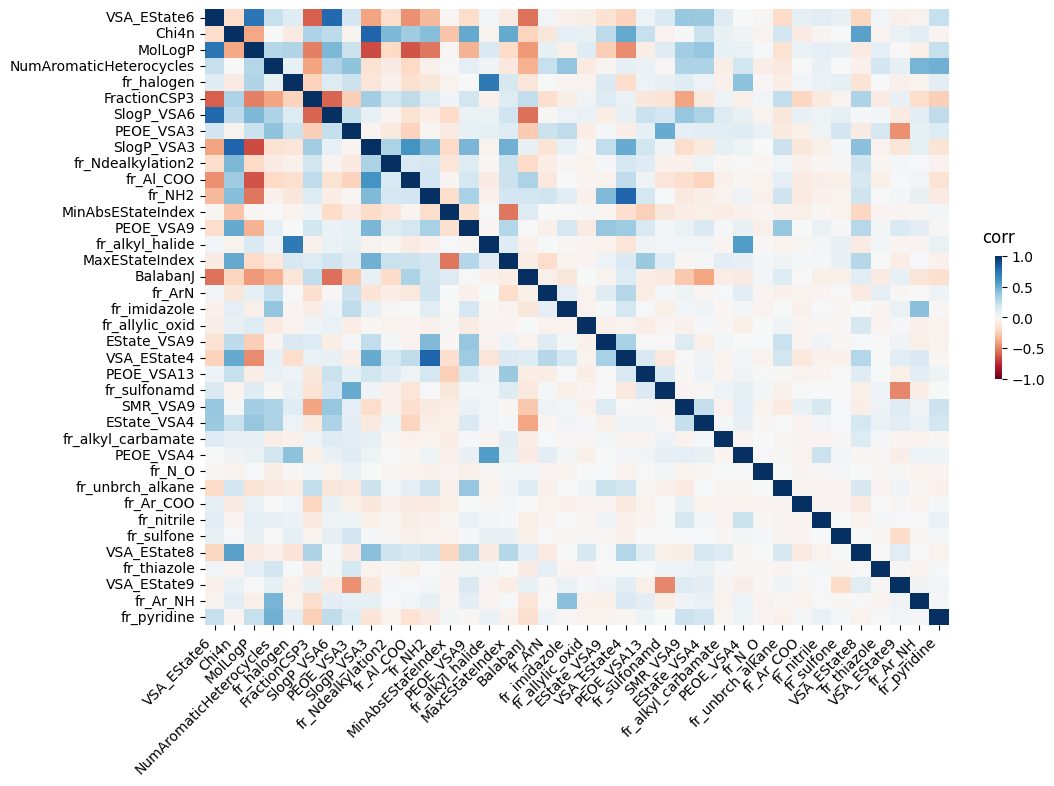

In [305]:
# heatmap
# 상관관계 행렬

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
ax = sns.heatmap(df_corr, annot = False, center = 0, cmap = 'RdBu', vmin=-1, vmax=1, cbar_kws={'shrink': 0.2, 'aspect': 20}, xticklabels=True)

# Color bar 타이틀 설정
colorbar = ax.collections[0].colorbar
colorbar.ax.set_title("corr", fontsize=12, pad = 10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\heatmap')
plt.savefig(f'heatmap_{df_name}.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [306]:
# 상관관계 수치
# 상관관계 |r| < 0.1의 개수
num_low_corr = np.count_nonzero(~np.isnan(df_corr[np.abs(df_corr) < 0.1]))
print(num_low_corr)

# 전체 개수
# 행 * 열 - 대각선
num_corr = (df_corr.shape[0] * df_corr.shape[1] - df_corr.shape[0])

# 전체에서 가지는 비율
print(num_low_corr / num_corr)

896
0.6372688477951636


In [307]:
df_corr['MaxEStateIndex']

VSA_EState6               -0.080065
Chi4n                      0.514475
MolLogP                   -0.189144
NumAromaticHeterocycles   -0.108074
fr_halogen                 0.164540
FractionCSP3               0.138538
SlogP_VSA6                 0.199958
PEOE_VSA3                  0.122308
SlogP_VSA3                 0.477811
fr_Ndealkylation2          0.225148
fr_Al_COO                  0.218269
fr_NH2                     0.183368
MinAbsEStateIndex         -0.538707
PEOE_VSA9                  0.290360
fr_alkyl_halide            0.119024
MaxEStateIndex             1.000000
BalabanJ                  -0.071475
fr_ArN                    -0.183441
fr_imidazole              -0.037030
fr_allylic_oxid           -0.030893
EState_VSA9                0.060640
VSA_EState4                0.148131
PEOE_VSA13                 0.373385
fr_sulfonamd               0.140278
SMR_VSA9                  -0.022915
EState_VSA4                0.022612
fr_alkyl_carbamate         0.104594
PEOE_VSA4                  0

# abs(coef) - default 3개 이용

In [308]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))

# # 계수가 0인 변수는 제거
# X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
# coefficients_None0 = coefficients[coefficients!=0]

# # 특성과 회귀계수 매핑
# df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
#                                        'Coefficient' : coefficients_None0})

# # 계수 큰 값 기준으로
# final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index

# X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]


# def mol_conv_upper(elastic_list, df):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list, df):
#     print('\n')
#     print('mol_conv.py under')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list, df):
#     print('\n')
#     print('exec_reg.py')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
#         idx += 1
#         n += 1

# # 출력
# mol_conv_upper(selected_features_elastic, X_train_None0)
# mol_conv_under(selected_features_elastic, X_train_None0)
# exec_reg(selected_features_elastic, X_train_None0)

# 랜덤하게 3 5 7 10 20... (성능 안좋음)

In [309]:
# random.seed(SEED)

# f_idx = random.sample(range(len(selected_features_elastic)), len(selected_features_elastic))

# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"mol_graph.{selected_features_elastic[i]} = dsc.{selected_features_elastic[i]}(mol)")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"normalize_self_feat(mol_graphs, '{selected_features_elastic[i]}')")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"self_feats[i, {n}] = mol_graph.{selected_features_elastic[i]}")
#     n += 1


# Permutation Importance 신뢰구간 95%

In [310]:
from sklearn.inspection import permutation_importance
from scipy.stats import norm

# Permutation Importance 계산
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=100,
                           random_state=SEED)

# p-value를 계산하고 유의미한 값 추출
significant_features = []
p_values = []

for i in r.importances_mean.argsort()[::-1]:
    mean = r.importances_mean[i]
    std = r.importances_std[i]
    
    # 신뢰구간 계산
    lower_bound = mean - 1.96 * std
    upper_bound = mean + 1.96 * std
    
    # 양측검정 p-value 계산
    p_value = 2 * (1 - norm.cdf(abs(mean / std)))    
    
    significant_features.append((X_train.columns[i], mean, std, p_value))
    p_values.append(p_value)

for feature, mean, std, p_value in significant_features:
    print(f"{feature:<30} \t"
          f"Importance: {mean:.3f} +/- {std:.3f} \t p-value: {p_value:.3f}")


Chi4n                          	Importance: 0.101 +/- 0.009 	 p-value: 0.000
VSA_EState6                    	Importance: 0.099 +/- 0.008 	 p-value: 0.000
MolLogP                        	Importance: 0.095 +/- 0.008 	 p-value: 0.000
fr_halogen                     	Importance: 0.043 +/- 0.005 	 p-value: 0.000
FractionCSP3                   	Importance: 0.041 +/- 0.005 	 p-value: 0.000
SlogP_VSA6                     	Importance: 0.038 +/- 0.005 	 p-value: 0.000
NumAromaticHeterocycles        	Importance: 0.034 +/- 0.005 	 p-value: 0.000
fr_Ndealkylation2              	Importance: 0.025 +/- 0.004 	 p-value: 0.000
SlogP_VSA3                     	Importance: 0.025 +/- 0.004 	 p-value: 0.000
PEOE_VSA3                      	Importance: 0.023 +/- 0.004 	 p-value: 0.000
fr_NH2                         	Importance: 0.017 +/- 0.003 	 p-value: 0.000
fr_Al_COO                      	Importance: 0.015 +/- 0.003 	 p-value: 0.000
PEOE_VSA9                      	Importance: 0.014 +/- 0.003 	 p-value: 0.000

In [311]:
df_pvalues = pd.DataFrame()
col = []
pval = []
imp = []

for i, p in enumerate(p_values):
    col.append(significant_features[i][0])
    imp.append(significant_features[i][1])
    pval.append(significant_features[i][3])

df_pvalues['Feature'] = col
df_pvalues['Importance'] = imp
df_pvalues['p-value'] = pval

df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
print(df_pvalues)

                    Feature  Importance       p-value
0                     Chi4n    0.101389  0.000000e+00
1               VSA_EState6    0.098543  0.000000e+00
2                   MolLogP    0.094506  0.000000e+00
3                fr_halogen    0.042686  2.220446e-16
4              FractionCSP3    0.040605  4.440892e-16
5                SlogP_VSA6    0.037654  6.661338e-16
6   NumAromaticHeterocycles    0.033790  3.159761e-11
7         fr_Ndealkylation2    0.025375  3.049186e-09
8                SlogP_VSA3    0.025311  4.166889e-12
9                 PEOE_VSA3    0.022598  3.024498e-08
10                   fr_NH2    0.016869  8.366547e-07
11                fr_Al_COO    0.015374  8.526504e-07
12                PEOE_VSA9    0.013879  7.952336e-07
13          fr_alkyl_halide    0.012180  1.191908e-06
14        MinAbsEStateIndex    0.011058  1.161773e-05
15                   fr_ArN    0.010772  1.867675e-06
16           MaxEStateIndex    0.010059  2.955972e-05
17          fr_allylic_oxid 

In [312]:
# 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)

print(df_pvalues_005)

                    Feature  Importance       p-value
0                     Chi4n    0.101389  0.000000e+00
1               VSA_EState6    0.098543  0.000000e+00
2                   MolLogP    0.094506  0.000000e+00
3                fr_halogen    0.042686  2.220446e-16
4              FractionCSP3    0.040605  4.440892e-16
5                SlogP_VSA6    0.037654  6.661338e-16
6   NumAromaticHeterocycles    0.033790  3.159761e-11
7         fr_Ndealkylation2    0.025375  3.049186e-09
8                SlogP_VSA3    0.025311  4.166889e-12
9                 PEOE_VSA3    0.022598  3.024498e-08
10                   fr_NH2    0.016869  8.366547e-07
11                fr_Al_COO    0.015374  8.526504e-07
12                PEOE_VSA9    0.013879  7.952336e-07
13          fr_alkyl_halide    0.012180  1.191908e-06
14        MinAbsEStateIndex    0.011058  1.161773e-05
15                   fr_ArN    0.010772  1.867675e-06
16           MaxEStateIndex    0.010059  2.955972e-05
17          fr_allylic_oxid 

In [313]:
# 최종 변수 출력
num_features = [3, 5, 7, 10, 20]

for i in num_features:
    print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

print(f'# {len(df_pvalues_005)}개')
print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']), '\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"mol_graph.{df_pvalues_005['Feature'][i]} = dsc.{df_pvalues_005['Feature'][i]}(mol)")

print('\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"normalize_self_feat(mol_graphs, '{df_pvalues_005['Feature'][i]}')")

print('\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"self_feats[i, {i}] = mol_graph.{df_pvalues_005['Feature'][i]}")

pdbbind_3 = ['Chi4n', 'VSA_EState6', 'MolLogP']
pdbbind_5 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3']
pdbbind_7 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles']
pdbbind_10 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3']
pdbbind_20 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3', 'fr_NH2', 'fr_Al_COO', 'PEOE_VSA9', 'fr_alkyl_halide', 'MinAbsEStateIndex', 'fr_ArN', 'MaxEStateIndex', 'fr_allylic_oxid', 'BalabanJ', 'fr_imidazole']
# 33개
pdbbind_elastic = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3', 'fr_NH2', 'fr_Al_COO', 'PEOE_VSA9', 'fr_alkyl_halide', 'MinAbsEStateIndex', 'fr_ArN', 'Ma

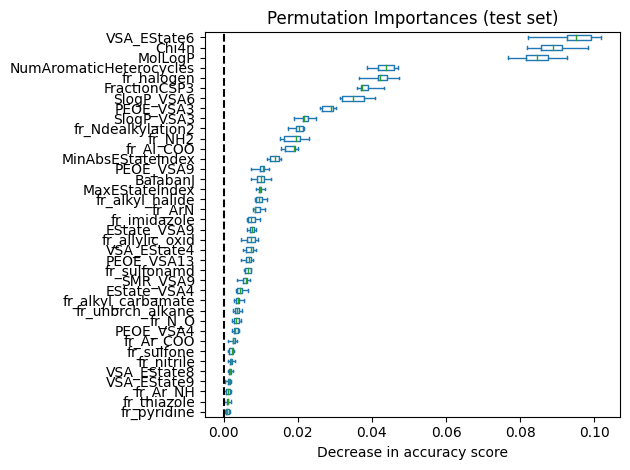

In [314]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_elastic_net, X_train_scaling, y_train, n_repeats=10, random_state=SEED, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [315]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=30,
                           random_state=SEED, scoring = 'r2')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<35}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

VSA_EState6                        0.100 +/- 0.007
Chi4n                              0.099 +/- 0.009
MolLogP                            0.098 +/- 0.006
fr_halogen                         0.044 +/- 0.005
FractionCSP3                       0.040 +/- 0.005
SlogP_VSA6                         0.038 +/- 0.004
NumAromaticHeterocycles            0.033 +/- 0.006
SlogP_VSA3                         0.026 +/- 0.003
fr_Ndealkylation2                  0.026 +/- 0.005
PEOE_VSA3                          0.022 +/- 0.005
fr_Al_COO                          0.015 +/- 0.003
fr_NH2                             0.015 +/- 0.004
PEOE_VSA9                          0.013 +/- 0.002
fr_alkyl_halide                    0.011 +/- 0.002
fr_ArN                             0.011 +/- 0.003
MinAbsEStateIndex                  0.011 +/- 0.003
MaxEStateIndex                     0.010 +/- 0.002
fr_allylic_oxid                    0.009 +/- 0.002
fr_imidazole                       0.008 +/- 0.002
BalabanJ                       

In [316]:
scoring = ['r2']
r_multi = permutation_importance(
    best_elastic_net, X_test_scaling, y_test, n_repeats=30, random_state=SEED, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
            print(f"    {X_train.columns[i]:<35}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    VSA_EState6                        0.100 +/- 0.007
    Chi4n                              0.099 +/- 0.009
    MolLogP                            0.098 +/- 0.006
    fr_halogen                         0.044 +/- 0.005
    FractionCSP3                       0.040 +/- 0.005
    SlogP_VSA6                         0.038 +/- 0.004
    NumAromaticHeterocycles            0.033 +/- 0.006
    SlogP_VSA3                         0.026 +/- 0.003
    fr_Ndealkylation2                  0.026 +/- 0.005
    PEOE_VSA3                          0.022 +/- 0.005
    fr_Al_COO                          0.015 +/- 0.003
    fr_NH2                             0.015 +/- 0.004
    PEOE_VSA9                          0.013 +/- 0.002
    fr_alkyl_halide                    0.011 +/- 0.002
    fr_ArN                             0.011 +/- 0.003
    MinAbsEStateIndex                  0.011 +/- 0.003
    MaxEStateIndex                     0.010 +/- 0.002
    fr_allylic_oxid                    0.009 +/- 0.002
    fr_

# permutation test (p-value)

In [317]:
# from scipy.stats import norm

# # 순열 검정 수행
# permutation_scores = []
# for _ in range(1000):  # 1000회 순열
#     shuffled_y = np.random.permutation(y_test)
#     score = permutation_importance(best_elastic_net, X_test_scaling, shuffled_y,
#                                    n_repeats = 30, random_state = SEED)
#     permutation_scores.append(score.importances_mean)

# # 귀무가설 하 분포 생성
# null_distribution = np.array(permutation_scores)

In [318]:
# # p-value 계산
# p_values = []
# for i, mean in enumerate(r.importances_mean):
#     # 단측 검정: 귀무가설 하 중요도 > 관측 중요도
#     # p_value = (null_distribution[:, i] >= mean).mean()

#     # 양측 검정: 귀무가설 하 중요도 > 관측 중요도
#     p_value = (null_distribution[:, i] >= mean).mean()
#     p_values.append(p_value)

In [319]:
# df_pvalues = pd.DataFrame()
# col = []
# pval = []
# imp = []

# for i, p in enumerate(p_values):
#     col.append(X_train.columns[i])
#     imp.append(r.importances_mean[i])
#     pval.append(p)

# df_pvalues['Feature'] = col
# df_pvalues['Importance'] = imp
# df_pvalues['p-value'] = pval

# df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
# print(df_pvalues)

In [320]:
# # 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
# df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
# df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False)

# print(df_pvalues_005)

In [321]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

# print(f'# {len(df_pvalues_005)}개')
# print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']))

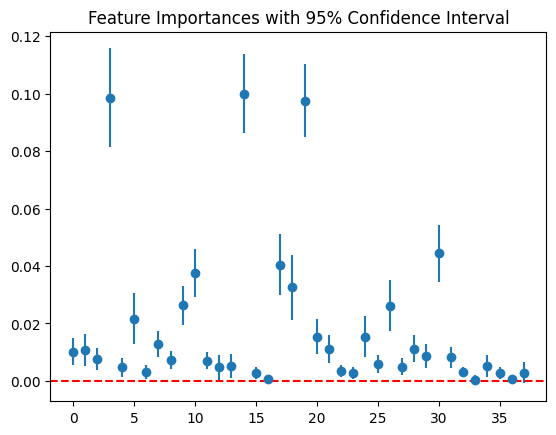

In [322]:
import matplotlib.pyplot as plt

plt.errorbar(range(len(r.importances_mean)), r.importances_mean, 
             yerr=1.96 * r.importances_std, fmt='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Feature Importances with 95% Confidence Interval")
plt.show()


In [323]:
# VIF 검사
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data[vif_data['VIF'] > 5])  # VIF > 5는 다중공선성 문제 가능성


                   Variable        VIF
0            MaxEStateIndex  34.796058
2                  BalabanJ  12.736581
3                     Chi4n  25.238180
7                 PEOE_VSA9   5.735631
9                SlogP_VSA3  14.447443
10               SlogP_VSA6  35.831681
13              VSA_EState4   7.357444
14              VSA_EState6  21.468050
17             FractionCSP3  10.460818
18  NumAromaticHeterocycles   6.213734
19                  MolLogP  10.725329
24                   fr_NH2   5.760387


# 예측

In [324]:
y_pred = best_elastic_net.predict(X_test_scaling)

In [325]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


2.0194456964552643
0.33885637589853235


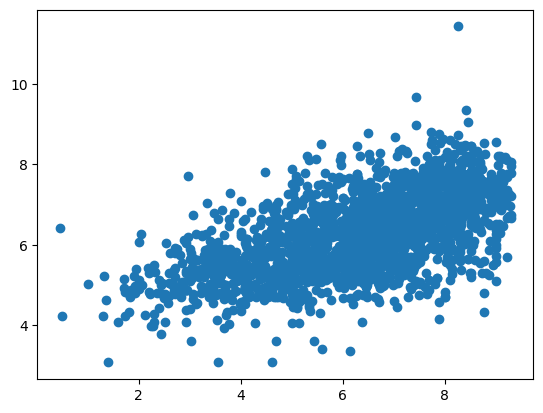

In [326]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.show()

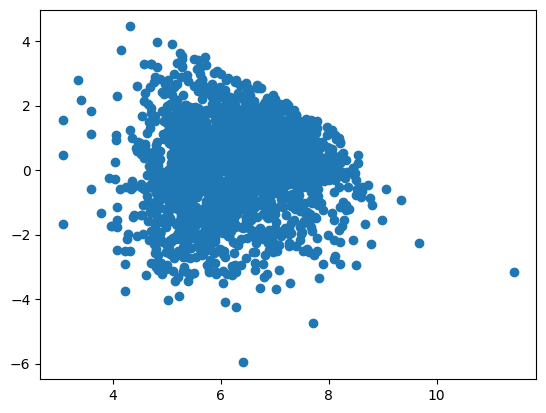

In [327]:
# 잔차 플랏
resid = y_test - y_pred

plt.scatter(y_pred, resid)
plt.show()

In [328]:
# # RFE 실행 (최종적으로 10개의 특성 선택)
# num_features = [3, 5, 7, 10, 20]
# for i in num_features:
#     rfe = RFE(estimator=optimal_elastic_net, n_features_to_select= i)
#     rfe.fit(X_train, y_train)

#     # RFE로 선택된 특성 이름 확인
#     selected_features_indices = rfe.support_
#     selected_features_names = X.columns[selected_features_indices]
#     print("최종 선택된 특성:", list(selected_features_names))

# # # 최종 선택된 특성으로 데이터프레임 생성
# # df_final_selected = ISIS_df[selected_features_names.tolist() + ['target']]
# # print("최종 데이터프레임:")
# # print(df_final_selected.head())

# p-value (부트스트랩 사용 X)

In [329]:
# from sklearn.utils import resample
# from scipy.stats import norm

# best_elastic_net.fit(X_train_scaling, y_train)

# # 원본 계수
# coef = best_elastic_net.coef_

# # 부트스트랩을 통한 유의확률 계산
# n_bootstraps = 1000
# n_features = X_train_scaling.shape[1]
# bootstrap_coefs = np.zeros((n_bootstraps, n_features))

# for i in range(n_bootstraps):
#     # 데이터 재표본화
#     X_resampled, y_resampled = resample(X_train_scaling, y_train, random_state=i)
#     # 재표본화된 데이터로 모델 학습
#     best_elastic_net.fit(X_resampled, y_resampled)
#     bootstrap_coefs[i] = best_elastic_net.coef_

# # 각 계수의 평균 및 표준편차
# coef_mean = np.mean(bootstrap_coefs, axis=0)
# coef_std = np.std(bootstrap_coefs, axis=0)

# # z-값 계산
# z_scores = (coef-coef_mean) / coef_std

# # p-value 계산 (정규분포 가정)
# p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# # 결과 출력
# results = pd.DataFrame({
#     'Feature': [f'Feature_{i}' for i in range(n_features)],
#     'Coefficient': coef,
#     'Std_Error': coef_std,
#     'z_score': z_scores,
#     'p_value': p_values
# })

# print(results)

# # 계수의 신뢰 구간 계산 (95% 신뢰 구간)
# confidence_interval = np.percentile(bootstrap_coefs, [2.5, 97.5], axis=0)

# # 0을 포함하지 않는 계수는 유의하다고 판단
# significant_coefs = np.where(~((confidence_interval[0] <= 0) & (confidence_interval[1] >= 0)))[0]
# print("Significant coefficients:", significant_coefs)


# t-value (사용 X)

In [330]:
# best_elastic_net.fit(X_train_scaling, y_train)

# # 예측값
# y_pred = best_elastic_net.predict(X_train_scaling)
# coefficients = best_elastic_net.coef_

# # 잔차
# residuals = y_train - y_pred
# # 잔차 제곱합 SSE
# SSE = np.sum(residuals**2)
# # n-p-1
# n_p_1 = len(y_train) - X_train_scaling.shape[1] - 1
# # 잔차의 표준편차 / 오차분산의 불편추정치
# residual_std = np.sqrt(SSE / n_p_1)

# # 표준 오차 계산
# # (X^{T} * X)^{-1}의 대각선 값 추출
# X = np.array(X_train_scaling)
# XtX_inv_diag = np.diag(np.linalg.inv(np.dot(X.T, X)))
# # 표준 오차
# standard_errors = residual_std * np.sqrt(XtX_inv_diag)

# # t-통계량 계산
# t_statistics = best_elastic_net.coef_ / standard_errors

# # elastic 모형
# e_model = pd.DataFrame({'feature' : X_train.columns,
#                         'coef' : coefficients,
#                         't-value' : t_statistics,
#                         'abs(t-value)' : abs(t_statistics)})
# e_model = e_model.sort_values(by='abs(t-value)', ascending = False)
# e_model


In [331]:
# e_model[e_model['abs(t-value)'] > 3].index

In [332]:
# # t-통계량이 3 이상인 변수만 출력
# final_selected_features_index = e_model[e_model['abs(t-value)'] > 3].index

# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(X_train.columns[final_selected_features_index[: i]]))

# print(f'\n#{len(e_model[e_model["abs(t-value)"] > 3].feature)}개')
# print(f'{df_name}_elastic =', list(e_model[e_model['abs(t-value)'] > 3].feature))


# 이건 사용X

In [333]:
# # feature와 계수 매핑
# final_selected_features = pd.DataFrame({'Feature' : X_train.columns,
#                                        'Coefficient' : coefficients})
# # 계수
# final_selected_features = abs(final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index
# final_selected_features_index

# final_selected_features

In [334]:
# final_selected_features_index.size

In [335]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]
# dfs = {}

# for i in num_features:
#     print(f'변수 {i}개: ', list(X_train.columns[final_selected_features_index[: i]]), '\n')
#     dfs[f'df_name_{i}'] = list(X_train.columns[final_selected_features_index[: i]])

In [336]:
# best_elastic_net.coef_.size 

## OLS 적합 (사용 X)

In [337]:
# import statsmodels.api as sm

# X_selected = X_train.iloc[:, best_elastic_net.coef_ != 0]  # 계수가 0이 아닌 변수만 선택
# ols_model = sm.OLS(y_train, X_selected).fit()

# ols_model.summary()

In [338]:
# df_coef = pd.DataFrame({'coef' : ols_model.params,
#                         'pvalue' : ols_model.pvalues,
#                         'abs_coef' : abs(ols_model.params)})
# df_coef = df_coef[df_coef['pvalue'] <= 0.05]
# df_coef = df_coef.sort_values(by = ['pvalue', 'abs_coef'], ascending = [True, False])

# print(list(df_coef.index))
# print(len(list(df_coef.index)))


## permutation importance (사용 X)

In [339]:
# from sklearn.inspection import permutation_importance

# threshold = 0.05

# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)

# importances = result.importances_mean
# sorted_idx = importances.argsort()[::-1]

# threshold_selected_features = X_train.columns[sorted_idx]
# threshold_selected_features = threshold_selected_features[importances[sorted_idx] >  threshold]
# print(list(threshold_selected_features))
# print(threshold_selected_features.size)


In [340]:
# import numpy as np
# from sklearn.inspection import permutation_importance


# # 원래 데이터의 Permutation Importance 계산
# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)
# original_importances = result.importances_mean

# # Null Distribution 생성: 피처를 무작위로 섞은 후 Permutation Importance 계산 반복
# n_permutations = 300
# null_distributions = np.zeros((n_permutations, X_test_scaling.shape[1]))

# for i in range(n_permutations):
#     # 타깃(y) 무작위화
#     y_permuted = np.random.permutation(y_test)
#     perm_result = permutation_importance(best_elastic_net, X_test_scaling, y_permuted, random_state = i)
#     null_distributions[i, :] = perm_result.importances_mean

# # p-value 계산: null 분포에서 original_importances보다 큰 값의 비율
# p_values = np.mean(null_distributions >= original_importances, axis=0)

# # 결과 출력
# feature_names = X_train.columns
# for feature, importance, p_value in zip(feature_names, original_importances, p_values):
#     print(f"Feature: {feature}, Importance: {importance:.4f}, p-value: {p_value:.4f}")

# # 유의한 피처 선택
# alpha = 0.05  # 유의 수준
# significant_features = feature_names[p_values <= alpha]
# print(f"Significant features (p < {alpha}): {list(significant_features)}")
